# **BY DIKSHA BHATI**

# **Task 1 : Prediction using Supervised ML**
# Predict the percentage of marks of an student based on the number of study hours

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

In [ ]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

#first 5 rows of data
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
# number of null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

**We do not have any null value in the data set**

In [ ]:
#shape of data
print("Number of rows in data are ",data.shape[0] ," and number of columns in data are ",data.shape[1])

Number of rows in data are  25  and number of columns in data are  2


In [ ]:
#basic statistical details
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


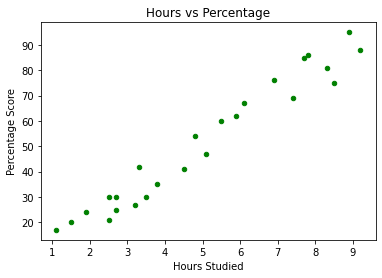

In [ ]:
#plotting the data
data.plot(kind='scatter',x='Hours', y='Scores',color='Green')    
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

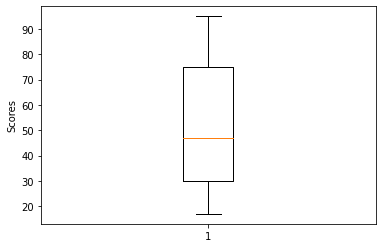

In [ ]:
# boxplot of Scores column
plt.boxplot(data['Scores'])
plt.ylabel('Scores')
plt.show()

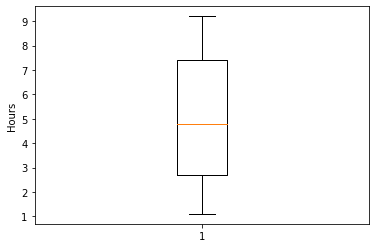

In [ ]:
# boxplot of Hours column
plt.boxplot(data['Hours'])
plt.ylabel('Hours')
plt.show()

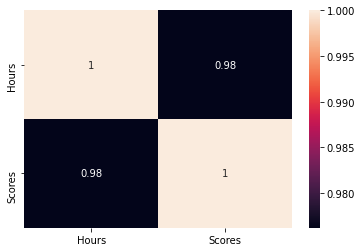

In [ ]:
sns.heatmap(data.corr(),annot=True)

**Correlation between Hours and Scores is 98%**

In [ ]:
#preparing data
X=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [ ]:
#splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [ ]:
# model training
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

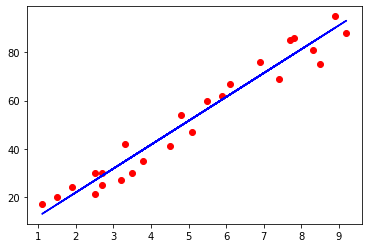

In [ ]:
# Plot regression line 
# equation of line is y=mx+c where m is slope and c is y-intercept
line = regressor.coef_*X+regressor.intercept_

# Plot the test data
plt.scatter(X, y,color='red')
plt.plot(X, line,color='blue');
plt.show()

In [ ]:
#predictions
y_pred = regressor.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [ ]:
#comparison between actual and predicted values
difference_df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
difference_df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


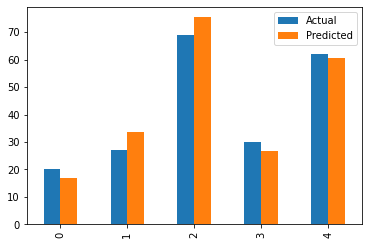

In [ ]:
difference_df.plot(kind='bar')

In [ ]:
# calculate error
mae_error=metrics.mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error:',mae_error)
mse_error=metrics.mean_squared_error(y_test,y_pred)
print('Mean Squared Error:',mse_error)

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456


In [ ]:
hours=[[9.25]]
predicted_score=regressor.predict(hours)
print('Number of Hours:',hours[0][0])
print('Predicted Score:',predicted_score[0])

Number of Hours: 9.25
Predicted Score: 93.69173248737539
